In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

## Weather Data

In [4]:
import requests
from config import weather_api_key
from datetime import datetime

In [5]:
# Build basic URL for OpenWeatherMap with weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | senno
Processing Record 2 of Set 1 | ca mau
Processing Record 3 of Set 1 | mirpur mathelo
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | halalo
City not found. Skipping...
Processing Record 9 of Set 1 | bhimavaram
Processing Record 10 of Set 1 | antofagasta
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | portel
Processing Record 13 of Set 1 | otradnoye
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | lorengau
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | narsaq
Pro

City not found. Skipping...
Processing Record 36 of Set 4 | tasiilaq
Processing Record 37 of Set 4 | olinda
Processing Record 38 of Set 4 | petropavl
Processing Record 39 of Set 4 | beira
Processing Record 40 of Set 4 | itoman
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | bonavista
Processing Record 44 of Set 4 | chardara
Processing Record 45 of Set 4 | krasnoyarsk-66
City not found. Skipping...
Processing Record 46 of Set 4 | khash
Processing Record 47 of Set 4 | oranjemund
Processing Record 48 of Set 4 | elk city
Processing Record 49 of Set 4 | isangel
Processing Record 50 of Set 4 | gorontalo
Processing Record 1 of Set 5 | scarborough
Processing Record 2 of Set 5 | beruwala
Processing Record 3 of Set 5 | dom pedro
Processing Record 4 of Set 5 | yulin
Processing Record 5 of Set 5 | warqla
City not found. Skipping...
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | bondoukou
Processing Recor

Processing Record 30 of Set 8 | leeuwarden
Processing Record 31 of Set 8 | bajil
Processing Record 32 of Set 8 | tuatapere
Processing Record 33 of Set 8 | juigalpa
Processing Record 34 of Set 8 | sukhobuzimskoye
Processing Record 35 of Set 8 | zhangjiakou
Processing Record 36 of Set 8 | pokhara
Processing Record 37 of Set 8 | quarai
Processing Record 38 of Set 8 | artigas
Processing Record 39 of Set 8 | oytal
Processing Record 40 of Set 8 | linhares
Processing Record 41 of Set 8 | najran
Processing Record 42 of Set 8 | deputatskiy
Processing Record 43 of Set 8 | la ronge
Processing Record 44 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 8 | rudnyy
Processing Record 46 of Set 8 | pelym
Processing Record 47 of Set 8 | shimoda
Processing Record 48 of Set 8 | butte
Processing Record 49 of Set 8 | luganville
Processing Record 50 of Set 8 | brae
Processing Record 1 of Set 9 | taoudenni
Processing Record 2 of Set 9 | buchanan
Processing Record 3 of Set 9 | saw

Processing Record 19 of Set 12 | mamallapuram
Processing Record 20 of Set 12 | khani
Processing Record 21 of Set 12 | hazorasp
Processing Record 22 of Set 12 | richards bay
Processing Record 23 of Set 12 | ajdabiya
Processing Record 24 of Set 12 | bentong
Processing Record 25 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 26 of Set 12 | higuey
City not found. Skipping...
Processing Record 27 of Set 12 | rafai
Processing Record 28 of Set 12 | basoko
Processing Record 29 of Set 12 | pemangkat
Processing Record 30 of Set 12 | codajas
Processing Record 31 of Set 12 | ilulissat
Processing Record 32 of Set 12 | soria
Processing Record 33 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 34 of Set 12 | bac lieu
Processing Record 35 of Set 12 | miles city
Processing Record 36 of Set 12 | santo domingo
Processing Record 37 of Set 12 | morondava
Processing Record 38 of Set 12 | sao joao da barra
Processing Record 39 of Set 12 | saint-francois
Processing R

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Senno,RU,2021-06-02 21:00:57,59.5336,33.9167,41.27,72,4,5.59
1,Ca Mau,VN,2021-06-02 21:00:58,9.1769,105.1500,79.56,90,100,4.23
2,Mirpur Mathelo,PK,2021-06-02 21:00:58,28.0227,69.5489,93.99,30,0,6.55
3,Bluff,NZ,2021-06-02 21:00:59,-46.6000,168.3333,49.80,83,98,9.28
4,Bengkulu,ID,2021-06-02 21:01:00,-3.8004,102.2655,76.87,84,67,4.65


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plotting

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

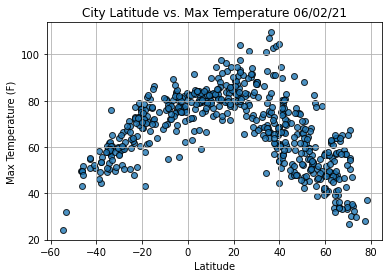

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

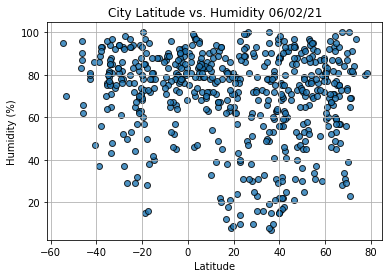

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

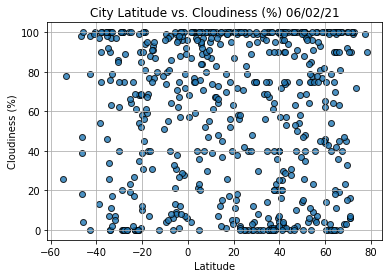

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

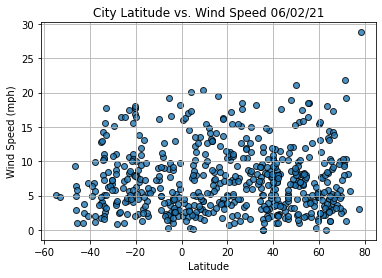

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


## Linear Correlation

In [14]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]


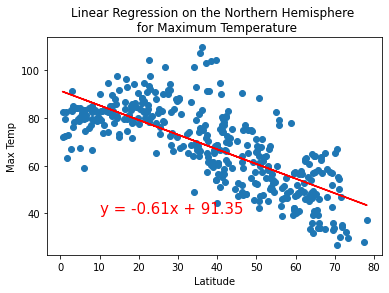

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))



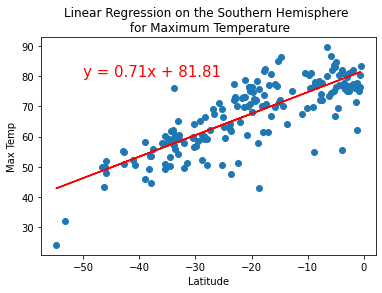

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,80))

In [43]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Senno,RU,2021-06-02 21:00:57,59.5336,33.9167,41.27,72,4,5.59
1,Ca Mau,VN,2021-06-02 21:00:58,9.1769,105.1500,79.56,90,100,4.23
2,Mirpur Mathelo,PK,2021-06-02 21:00:58,28.0227,69.5489,93.99,30,0,6.55
6,Bhimavaram,IN,2021-06-02 21:01:00,16.5333,81.5333,83.84,82,1,4.00
8,Tuktoyaktuk,CA,2021-06-02 21:01:02,69.4541,-133.0374,36.00,74,92,9.98


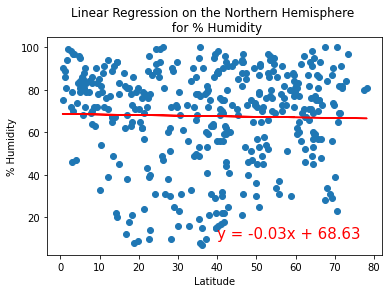

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity',(40,10))



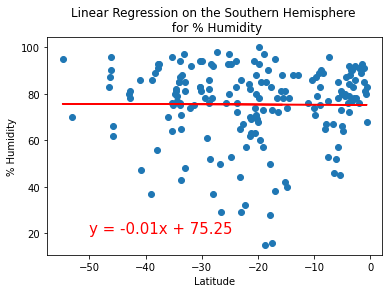

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-50,20))


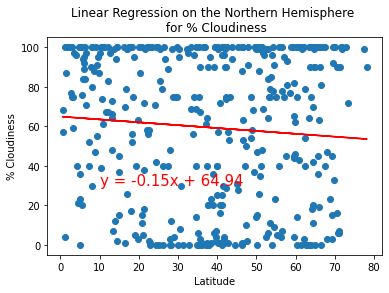

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(10,30))


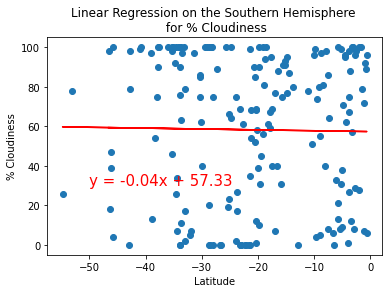

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-50,30))

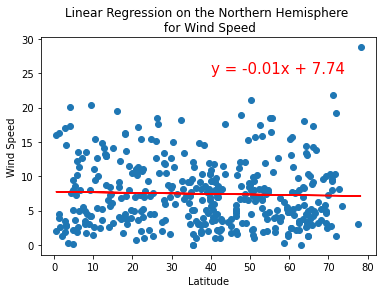

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',(40,25))

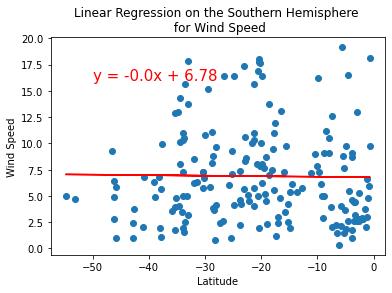

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(-50,16))